In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
Bank_DF = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")

In [4]:
Bank_DF.head(6)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0


In [5]:
Bank_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
# checking missing values
print (Bank_DF.isnull().sum())

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


   Personal Loan  count   prop
0              0   4520  0.904
1              1    480  0.096


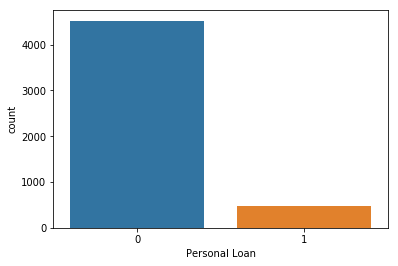

In [7]:
## Target Variable Frequency Distribution
freq = Bank_DF['Personal Loan'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
print (freq)

import seaborn as sns
sns.countplot(Bank_DF['Personal Loan'])

In [8]:
# Target variable frequency distribution shows out of 5000 customers only 480 (9.6%) accepted the personal loan that was offered to them in the earlier campaign.
# Targer variable frequency distribution is imbalanced.

In [9]:
# Data frame summary statistics
Bank_DF.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


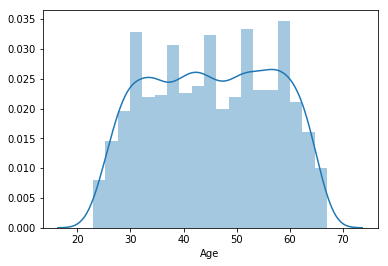

In [10]:
sns.distplot(Bank_DF["Age"],bins = "auto")
### mean and median are similar for "age" variable. hence distribution of varibale is normal.

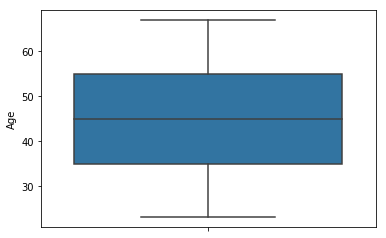

In [11]:
sns.boxplot(y = 'Age', data = Bank_DF)

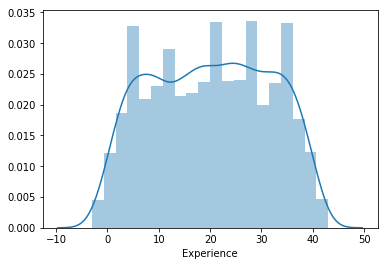

In [12]:
sns.distplot(Bank_DF["Experience"],bins = "auto")
### mean and median are similar for "Experience" variable. hence distribution of varibale is normal.

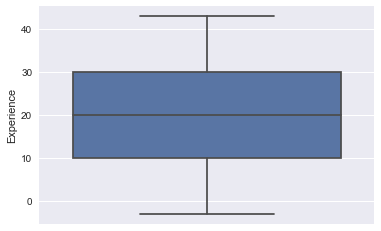

In [36]:
sns.boxplot(y = 'Experience', data = Bank_DF)

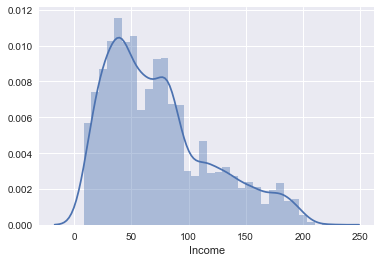

In [37]:
sns.distplot(Bank_DF["Income"],bins = "auto")
# mean is greater than median. "Income" variable distribution is right skewed.
# box plot of "Income variable" shows outliers and mean is getting affected by outliers.

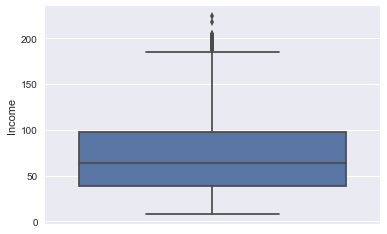

In [38]:
sns.boxplot(y = 'Income', data = Bank_DF)

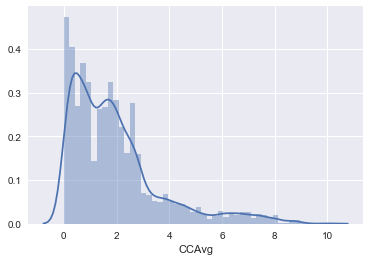

In [39]:
sns.distplot(Bank_DF["CCAvg"],bins = "auto")
# mean is greater than median. "CCAvg" variable distribution is right skewed.
# box plot of "CCAvg variable" shows outliers and mean is getting affected by outliers.

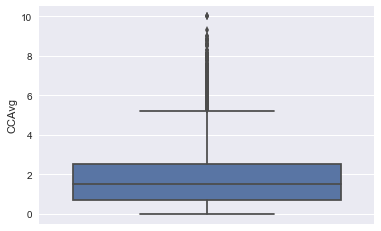

In [40]:
sns.boxplot(y = 'CCAvg', data = Bank_DF)

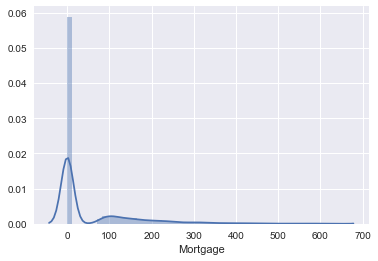

In [41]:
sns.distplot(Bank_DF["Mortgage"],bins = "auto")

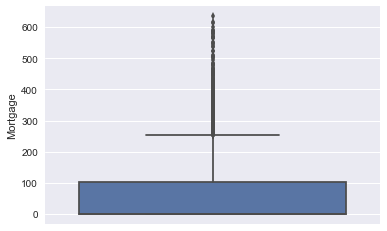

In [42]:
sns.boxplot(y = 'Mortgage', data = Bank_DF)

   Family  count    prop
0       1   1472  0.2944
1       2   1296  0.2592
2       4   1222  0.2444
3       3   1010  0.2020


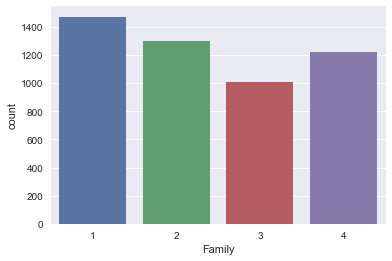

In [46]:
freq = Bank_DF['Family'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
print (freq)

import seaborn as sns
sns.countplot(Bank_DF['Family'])

   Education  count    prop
0          1   2096  0.4192
1          3   1501  0.3002
2          2   1403  0.2806


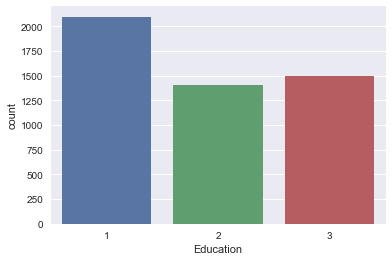

In [47]:
freq = Bank_DF['Education'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
print (freq)

import seaborn as sns
sns.countplot(Bank_DF['Education'])

   Securities Account  count    prop
0                   0   4478  0.8956
1                   1    522  0.1044


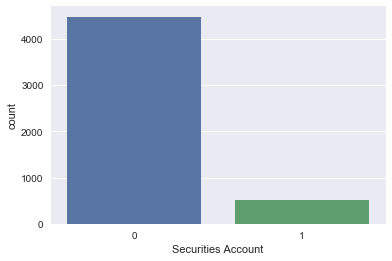

In [48]:
freq = Bank_DF['Securities Account'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
print (freq)

import seaborn as sns
sns.countplot(Bank_DF['Securities Account'])

   CD Account  count    prop
0           0   4698  0.9396
1           1    302  0.0604


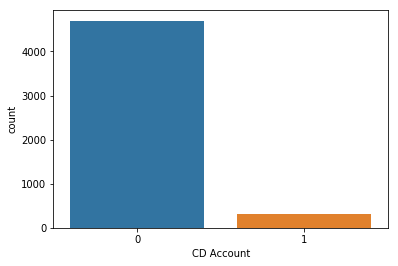

In [9]:
freq = Bank_DF['CD Account'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
print (freq)

import seaborn as sns
sns.countplot(Bank_DF['CD Account'])

   Online  count    prop
0       1   2984  0.5968
1       0   2016  0.4032


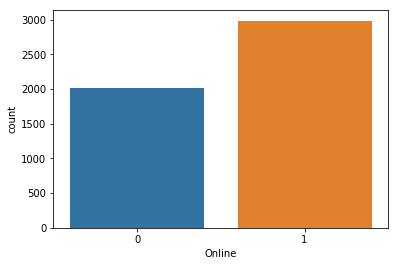

In [10]:
freq = Bank_DF['Online'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
print (freq)

import seaborn as sns
sns.countplot(Bank_DF['Online'])

   CreditCard  count   prop
0           0   3530  0.706
1           1   1470  0.294


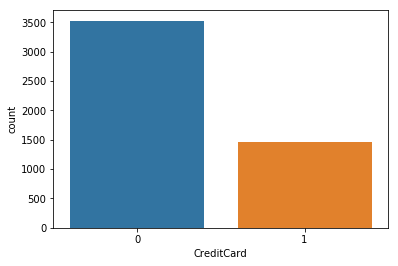

In [14]:
freq = Bank_DF['CreditCard'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
print (freq)

import seaborn as sns
sns.countplot(Bank_DF['CreditCard'])

In [5]:
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
independent= Bank_DF.drop(["ID", "ZIP Code","Personal Loan"],axis=1)
dependent= Bank_DF["Personal Loan"]
independent = independent.apply(zscore)
X_train, X_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.3,random_state=5)

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)


In [15]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='accuracy', verbose=0)

In [16]:
# view the results as a pandas DataFrame
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.955429,0.010318,{'n_neighbors': 1}
1,0.950286,0.010680,{'n_neighbors': 2}
2,0.959429,0.009107,{'n_neighbors': 3}
3,0.952857,0.008674,{'n_neighbors': 4}
4,0.958571,0.008876,{'n_neighbors': 5}
5,0.951429,0.010908,{'n_neighbors': 6}
6,0.954286,0.008363,{'n_neighbors': 7}
7,0.949143,0.008823,{'n_neighbors': 8}
8,0.952571,0.010238,{'n_neighbors': 9}
9,0.946857,0.009472,{'n_neighbors': 10}


In [17]:
# examine the first result
print(grid.cv_results_['params'][0])
print(grid.cv_results_['mean_test_score'][0])

{'n_neighbors': 1}
0.955428571429


In [18]:
# print the array of mean scores only
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)

[ 0.95542857  0.95028571  0.95942857  0.95285714  0.95857143  0.95142857
  0.95428571  0.94914286  0.95257143  0.94685714  0.95028571  0.94628571
  0.94685714  0.94314286  0.94542857  0.94342857  0.94428571  0.94114286
  0.94171429  0.94114286  0.94171429  0.94028571  0.94142857  0.94
  0.94057143  0.93885714  0.93942857  0.93742857  0.93857143  0.93714286]


Text(0, 0.5, 'Cross-Validated Accuracy')

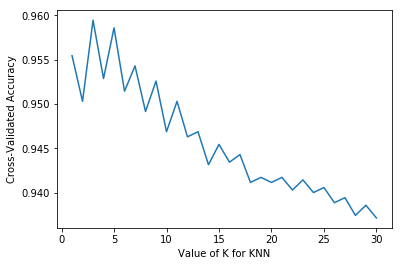

In [19]:
# plot the results
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [20]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.959428571429
{'n_neighbors': 3}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')


In [24]:
KNN = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [22]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [24]:
y_pred = KNN.predict(X_test)

In [37]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[1343    8]
 [  55   94]]


In [39]:
# Accuracy calculation
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred))

0.958
0.958


In [40]:
## classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred))

0.042
0.042


In [41]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_pred))

0.630872483221
0.630872483221


In [42]:
specificity = TN / (TN + FP)

print(specificity)

0.9940784604


In [43]:
false_positive_rate = FP / float(TN + FP)
print(false_positive_rate)
print(1 - specificity)

0.0059215396003
0.0059215396003


In [45]:
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test, y_pred))

0.921568627451
0.921568627451


In [130]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc


0.81247547181059021

In [123]:
y_pred_proba = KNN.predict_proba(X_test)[:,1]

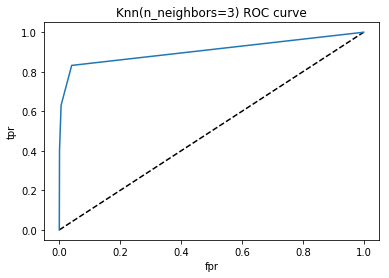

In [124]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=3) ROC curve')
plt.show()

In [125]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.90708846044938141

In [25]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(KNN, X_train, y_train, cv=10, scoring='roc_auc').mean()

0.89682846484438927

In [32]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate model
logreg = LogisticRegression()

# fit model
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [117]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

In [118]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[1335   16]
 [  55   94]]


In [119]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.952666666667


In [81]:
## classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.0473333333333
0.0473333333333


In [82]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_pred_class))

0.630872483221
0.630872483221


In [83]:
specificity = TN / (TN + FP)

print(specificity)

0.988156920799


In [84]:
false_positive_rate = FP / float(TN + FP)
print(false_positive_rate)
print(1 - specificity)

0.0118430792006
0.0118430792006


In [85]:
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test,y_pred_class))

0.854545454545
0.854545454545


In [120]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_class)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.80951470201044218

In [128]:
y_pred_proba_1 = logreg.predict_proba(X_test)[:,1]


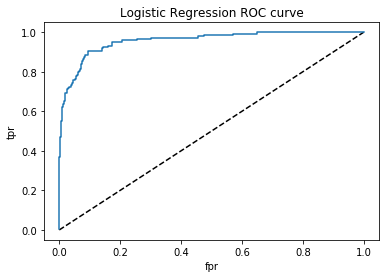

In [122]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logistic Regression')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Logistic Regression ROC curve')
plt.show()

In [116]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba_1)

0.95748612760122997

In [133]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X_train, y_train, cv=10, scoring='roc_auc').mean()

0.95744482769493866

In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
NB = BernoulliNB()
NB.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [8]:
# make class predictions for the testing set
y_pred_class1 = NB.predict(X_test)

In [11]:
# save confusion matrix and slice into four pieces
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred_class1)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[1328   23]
 [ 108   41]]


In [12]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.912666666667


In [13]:
## classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred_class1))

0.0873333333333
0.0873333333333


In [14]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_pred_class1))

0.275167785235
0.275167785235


In [15]:
specificity = TN / (TN + FP)

print(specificity)

0.982975573649


In [16]:
false_positive_rate = FP / float(TN + FP)
print(false_positive_rate)
print(1 - specificity)

0.0170244263509
0.0170244263509


In [17]:
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test,y_pred_class1))

0.640625
0.640625


In [18]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_class1)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.62907167944202402

In [19]:
y_pred_proba_2 = NB.predict_proba(X_test)[:,1]

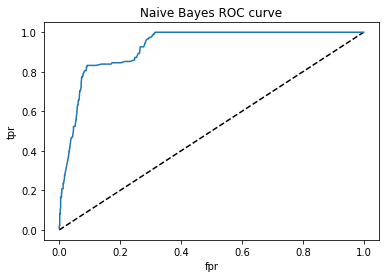

In [20]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_2)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Naive Bayes')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Naive Bayes ROC curve')
plt.show()

In [21]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba_2)

0.92537469137949013

In [22]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(NB, X_train, y_train, cv=10, scoring='roc_auc').mean()

0.9274103871109961

#### CONCLUSION ####

### Logistic Regression model performs better than KNN and naive bayes models in terms of metrics Accuracy, sensitivity, specificity and CV ROC_AUC.